In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [34]:
import locale
from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')

'en_US.UTF-8'

In [40]:
data_directory = "clean-data/"
all_tsvs = ["ct", "iso_ne_ca", "me", "nema", "nh", "ri", "sema", "vt", "wcma"]
all_data = { file_name : pd.read_csv(data_directory + file_name + ".tsv", sep='\t', thousands=',', parse_dates=['Date']) 
             for file_name in all_tsvs }

In [41]:
all_data["ct"].head()

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point
0,2017-01-01,1,2730.6,2842.29,34.84,34.86,0.0,-0.02,36.48,36.53,0.0,-0.05,NaN,NaN
1,2017-01-01,2,2583.5,2706.95,33.80,33.72,0.0,0.08,37.01,37.02,0.0,-0.01,NaN,NaN
2,2017-01-01,3,2498.3,2601.69,32.49,32.40,0.0,0.09,35.77,35.79,0.0,-0.02,NaN,NaN
3,2017-01-01,4,2465.8,2535.49,25.98,25.88,0.0,0.10,34.06,34.04,0.0,0.02,NaN,NaN
4,2017-01-01,5,2500.7,2524.59,29.71,29.65,0.0,0.06,35.42,35.36,0.0,0.06,NaN,NaN


Index(['Date', 'Hr_End', 'DA_Demand', 'RT_Demand', 'DA_LMP', 'DA_EC', 'DA_CC',
       'DA_MLC', 'RT_LMP', 'RT_EC', 'RT_CC', 'RT_MLC', 'Dry_Bulb',
       'Dew_Point'],
      dtype='object')
Date         datetime64[ns]
Hr_End                int64
DA_Demand           float64
RT_Demand           float64
DA_LMP              float64
DA_EC               float64
DA_CC               float64
DA_MLC              float64
RT_LMP              float64
RT_EC               float64
RT_CC               float64
RT_MLC              float64
Dry_Bulb            float64
Dew_Point           float64
dtype: object


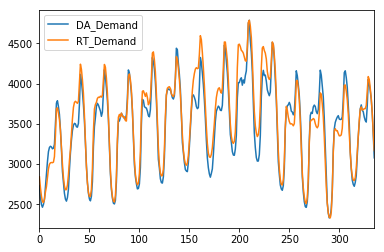

In [48]:
ct_data = all_data["ct"]
print(ct_data.columns)
print(ct_data.dtypes)
ct_data[['DA_Demand', 'RT_Demand']][:24*7].plot()

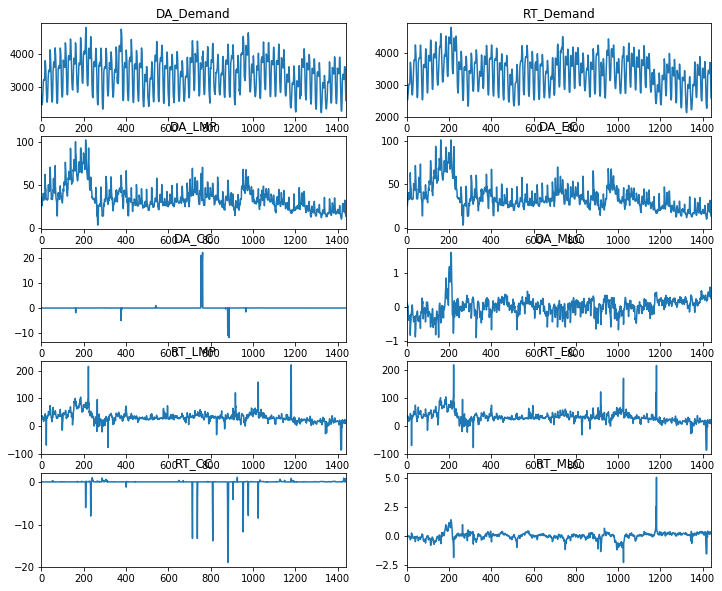

In [67]:
NUM_DAYS = 60

fig = plt.figure()
fig.set_size_inches(12, 10)
i = 1

for col in ct_data.columns:
    if ct_data[col].dtype == np.float64 and i <= 10:
        plt.subplot(5,2,i)
        ct_data[col][:24*NUM_DAYS].plot(title=col)
        
        i += 1

11.284639830508477


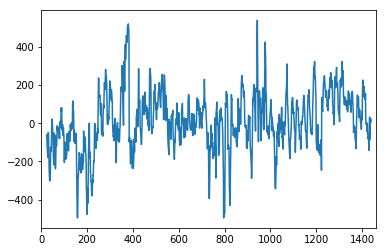

In [69]:
N = 24*60
LAG = 24
diffs = ct_data['DA_Demand'][LAG:LAG+N-1] - ct_data['RT_Demand'][1:N]
print(diffs.mean())
diffs.plot()